In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/zomato-analsis-with-vishu/zomato.csv')
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [4]:
df = df.fillna(0)


In [5]:
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df["approx_cost(for two people)"] = (
    df["approx_cost(for two people)"]
    .astype(str)                 
    .str.replace(",", "", regex=False) 
    .replace("nan", None)        
    .astype(float)             
)

In [8]:
df['cuisines'].value_counts().head(10)

cuisines
North Indian                           2913
North Indian, Chinese                  2385
South Indian                           1828
Biryani                                 918
Bakery, Desserts                        911
Fast Food                               803
Desserts                                766
Cafe                                    756
South Indian, North Indian, Chinese     726
Bakery                                  651
Name: count, dtype: int64

In [9]:
df['location'].value_counts().head(10)

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Name: count, dtype: int64

In [10]:
df['rate'].value_counts().head(10)

rate
0         7775
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
3.8 /5    1851
3.7 /5    1810
3.6/5     1773
4.0/5     1609
Name: count, dtype: int64

In [11]:
df['rest_type'].value_counts().head(10)

rest_type
Quick Bites           19132
Casual Dining         10330
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           867
Bar                     697
Name: count, dtype: int64

In [12]:
# sns.histplot(df['rate'], kde=True)
# plt.show()


In [13]:
# sns.scatterplot(data=df, x='approx_cost(for two people)', y='rate')
# plt.show()


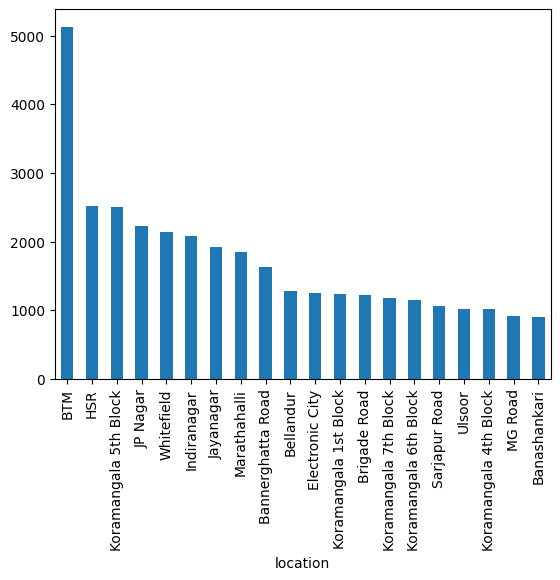

In [14]:
df['location'].value_counts().head(20).plot(kind='bar')
plt.show()


In [15]:
df.isnull().sum()


url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [16]:
df=df.fillna(0)
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [17]:
df['rate'] = (
    df['rate'].astype(str)
    .str.replace('/5','', regex=False)
    .replace(['NEW','-'], None)
)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df.groupby('online_order')['rate'].mean()

online_order
No     2.632426
Yes    3.451459
Name: rate, dtype: float64

In [18]:
df.groupby('book_table')['rate'].mean()

book_table
No     2.969824
Yes    4.132975
Name: rate, dtype: float64

### Business Insights (Your Value!)
insights dene chahiye:

📌 1. which cuisines most popular? ,
📌 2. High rating restaurants how belongs price range?,
📌 3. which city/location most of restaurent?,
📌 4. Delivery vs Dine-in: ratings difference,
📌 5. Online order restaurants performance.